<a href="https://colab.research.google.com/github/dokin0802/SinGAN/blob/master/ssess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

N_EPOCHS = 50
N_BATCH = 20

learning_rate = 0.001
dropout_rate = 0.5

np.random.seed(1)
tf.random.set_seed(1)


def create_model():
    model = keras.Sequential()
    model.add(layers.Conv2D(64, kernel_size=3, padding="SAME", activation='relu', 
                            input_shape=(150,150,3)))
    model.add(layers.MaxPool2D(padding='SAME'))

    model.add(layers.Conv2D(64, kernel_size=3, padding="SAME", activation='relu'))
    model.add(layers.MaxPool2D(padding='SAME'))

    model.add(layers.Conv2D(128, kernel_size=3, padding="SAME", activation='relu'))
    model.add(layers.MaxPool2D(padding='SAME'))

    model.add(layers.Conv2D(128, kernel_size=3, padding="SAME", activation='relu'))
    model.add(layers.MaxPool2D(padding='SAME'))

    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [5]:
train_dir = '/content/gdrive/MyDrive/architecture_small/train'
validation_dir = '/content/gdrive/MyDrive/architecture_small/val'
test_dir = '/content/gdrive/MyDrive/architecture_small/test'

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1/255) 
test_datagen =  ImageDataGenerator(rescale=1/255) 

In [7]:
train_generator = train_datagen.flow_from_directory(
                                    train_dir, 
                                    target_size=(150,150), 
                                    class_mode='binary',
                                    batch_size=N_BATCH   
                                )

validation_generator = test_datagen.flow_from_directory(
                                    validation_dir,
                                    target_size=(150,150), 
                                    class_mode='binary', 
                                    batch_size=N_BATCH   
                                )
# Test Set
test_generator = test_datagen.flow_from_directory(
                                    test_dir, 
                                    target_size=(150,150), 
                                    class_mode='binary', 
                                    batch_size=N_BATCH  
                                )

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
train_generator.class_indices # {'g': 0, 'dogs': 1}


len(train_generator), len(validation_generator), len(test_generator) # (100, 50, 50)


batch = train_generator.next() #2

len(batch), type(batch) #(2, tuple)

type(batch[0]), batch[0].shape # (numpy.ndarray, (20, 150, 150, 3))

(numpy.ndarray, (20, 150, 150, 3))

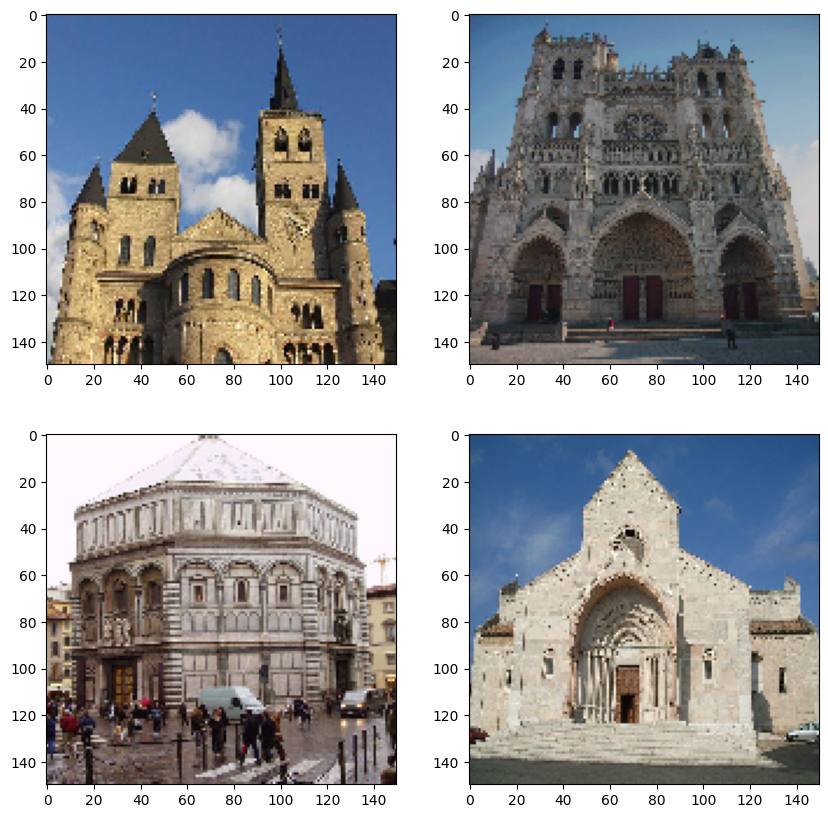

In [9]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(batch[0][i])
plt.show()   

In [10]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='binary_crossentropy',  
              metrics=['accuracy'])


history= model.fit(train_generator, 
                    epochs=N_EPOCHS,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator, 
                    validation_steps = len(validation_generator)
                    )
     

Epoch 1/50
20/20 [==============================] - 195s 10s/step - loss: 0.7074 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 9s 465ms/step - loss: 0.6938 - accuracy: 0.4875 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 9s 459ms/step - loss: 0.6933 - accuracy: 0.4925 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 9s 447ms/step - loss: 0.6945 - accuracy: 0.4875 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
20/20 [==============================] - 9s 457ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 9s 437ms/step - loss: 0.6934 - accuracy: 0.4575 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 7/50
20/20 [==============================] - 9s 468ms/step - loss: 0.6958 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 

In [ ]:
from keras.models import load_model
model.save('/content/gdrive/My Drive/archi_0.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/archi_0.h5')
model.summary()

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: ignored

In [11]:
model.evaluate(test_generator)

5/5 [==============================] - 49s 12s/step - loss: 2.6738 - accuracy: 0.6000


[2.6738405227661133, 0.6000000238418579]

In [12]:
train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range= 40,
    width_shift_range=0.2, #[-0.2, 0, +0.2]  ex)[-1, -0.5, 0, 0.5, 1]
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1/255) 
     

In [13]:
train_generator = train_gen.flow_from_directory(train_dir,
                                                target_size=(150,150),
                                                class_mode='binary',
                                                batch_size=N_BATCH)

validation_generator = test_gen.flow_from_directory(validation_dir,
                                                target_size=(150,150),
                                                class_mode='binary',
                                                batch_size=N_BATCH)

test_generator = test_gen.flow_from_directory(test_dir,
                                                target_size=(150,150),
                                                class_mode='binary',
                                                batch_size=N_BATCH)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [14]:
model.evaluate(train_generator)

20/20 [==============================] - 10s 492ms/step - loss: 1.8219 - accuracy: 0.6175


[1.8219271898269653, 0.6175000071525574]

In [15]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_path = os.path.join(train_dir, 'g', 'g (11).jpg')
print(image_path)

img = load_img(image_path)
img

/content/gdrive/MyDrive/architecture_small/train/g/g (11).jpg


In [16]:
x = img_to_array(img)
x = x[np.newaxis, ...]
x.shape 

In [ ]:
train_gen2 = ImageDataGenerator(
    # rescale = 1/255,
    rotation_range= 40,
    width_shift_range=0.2, #[-0.2, 0, +0.2]  ex)[-1, -0.5, 0, 0.5, 1]
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
     

In [ ]:
gen = train_gen2.flow(x, batch_size=1) 
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5, 1, i+1)
    batch = gen.next()
    img = batch[0].astype('uint8')
    plt.imshow(img)
plt.show()

In [ ]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

In [ ]:
history=model.fit(train_generator,
                epochs=N_EPOCHS,
                steps_per_epoch=len(train_generator),
                validation_data = validation_generator,
                validation_steps=len(validation_generator))

In [ ]:
model.evaluate(test_generator) 
